In [1]:
#Import the necessary packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout

aqdf = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",", header=0)

C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Function for Plotting Loss Vs Epochs
plt.rcParams['axes.facecolor'] = 'white'
def plt_dynamic(x, vy, ty):
    plt.figure(figsize=(20,10))
    plt.plot(x, vy, 'b', label="Validation Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model's Train & Validation loss across epochs")
    plt.legend()
    plt.grid(c='grey')
    plt.show()

In [3]:
aqdf.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
# remove first and last 2 cols 
aqdf = aqdf.drop(["Date","Time","Unnamed: 15","Unnamed: 16"], axis=1)

# fill NaNs in each column with the mean value
aqdf = aqdf.fillna(aqdf.mean())


In [5]:
aqdf.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [6]:
aqdf.shape

(9471, 13)

In [7]:
y = aqdf["C6H6(GT)"]
X = aqdf.drop(["C6H6(GT)"], axis=1)

In [8]:
from sklearn.model_selection import train_test_split
# Train and test dataset with an 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Dividing training dataset into train and validation dataset with an 90:10 split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

print("Shape of x_train:",X_train.shape)
print("Shape of x_test:",X_test.shape)
print("Shape of x_val:",X_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (6818, 12)
Shape of x_test: (1895, 12)
Shape of x_val: (758, 12)
Shape of y_train: (6818,)
Shape of y_test: (1895,)
Shape of y_val: (758,)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)
Xmeans = scaler.mean_
Xstds = scaler.scale_

In [10]:
model= Sequential([
Dense(150, input_dim=12,activation="relu"),
Dense(1, activation='linear'),
])
# Model Summary
model.summary()
# Compiling the Model
model.compile(loss="mean_squared_error",optimizer='adam',
metrics=["mean_absolute_error"])
# Fitting the Model
history=model.fit(X_train,y_train,verbose=1,validation_data=(X_val,y_val),epochs=6,batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               1950      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________
Train on 6818 samples, validate on 758 samples
Epoch 1/6
6818/6818 [==============================] - 29s 4ms/step - loss: 1420.5681 - mean_absolute_error: 15.7355 - val_loss: 911.0361 - val_mean_absolute_error: 12.4075
Epoch 2/6
6818/6818 [==============================] - 1s 92us/step - loss: 554.2148 - mean_absolute_error: 9.2100 - val_loss: 173.4249 - val_mean_absolute_error: 5.8196
Epoch 3/6
6818/6818 [==============================] - 1s 91us/step - loss: 73.2994 - mean_absolute_error: 4.5202 - val_loss: 20.3075 - val_mean_a

Test Mean Absolute Error: 1.819185794060337
Train Mean Absolute Error: 6.533092854903499


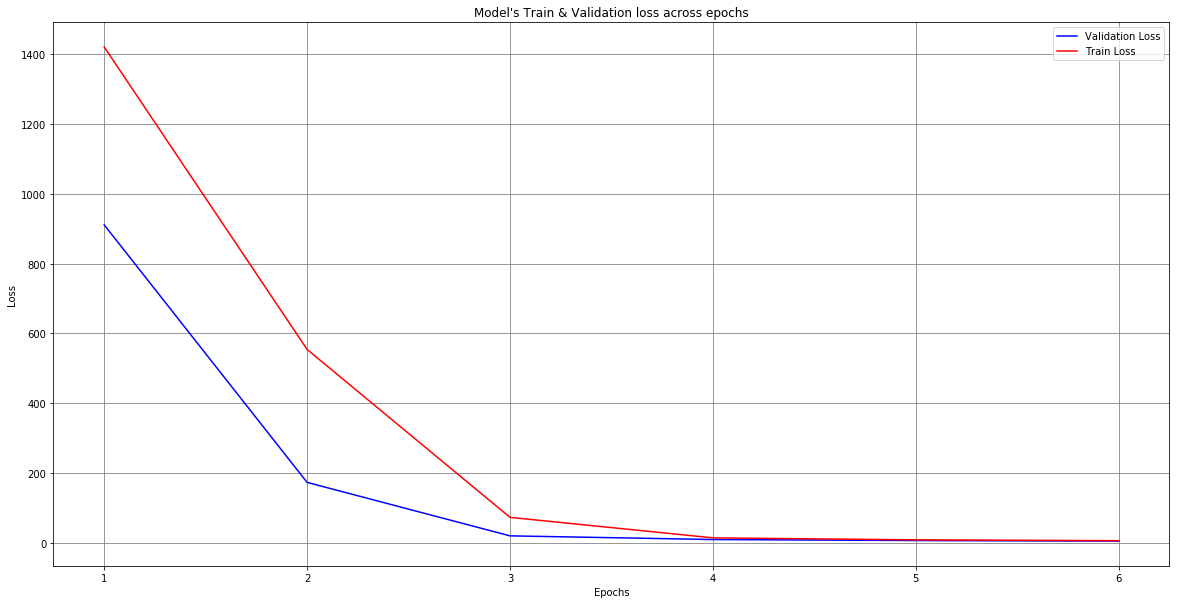

In [11]:
epochs=6
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test Mean Absolute Error:', score[1])

# Test and train Loss of the model
model
model_test = score[1]
model_train = history.history['loss']
print('Train Mean Absolute Error:', model_train[5])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,epochs+1))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# PLot Function for Loss vs Epochs
plt_dynamic(x, vy, ty)